
📂 Processing file: results/mlp/1118_features_fluctuating_cleaned_predicted.csv


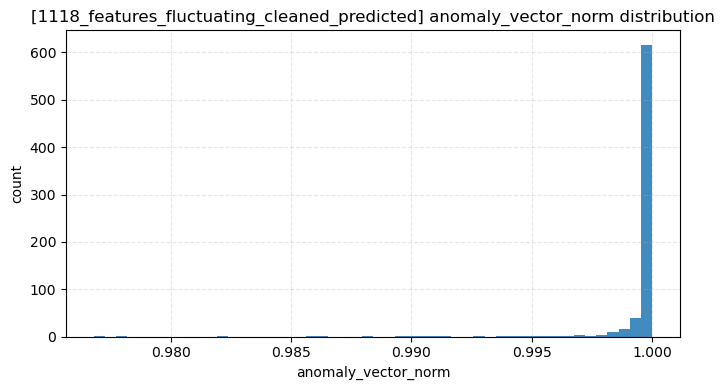


📂 Processing file: results/mlp/1118_features_misalignment_cleaned_predicted.csv


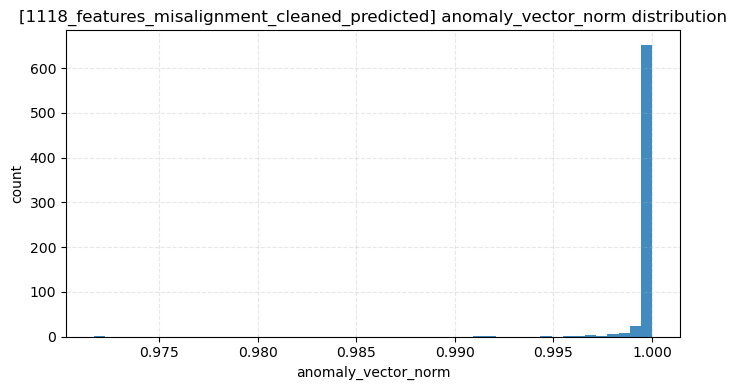


📂 Processing file: results/mlp/1118_features_cleaned_predicted.csv


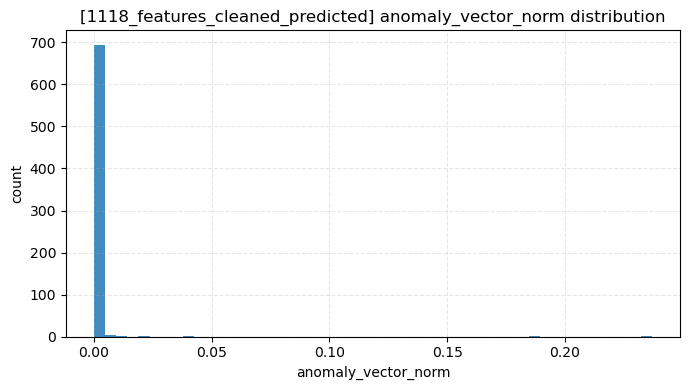


📂 Processing file: results/mlp/1118_features_fluctuating_yellow_cleaned_predicted.csv


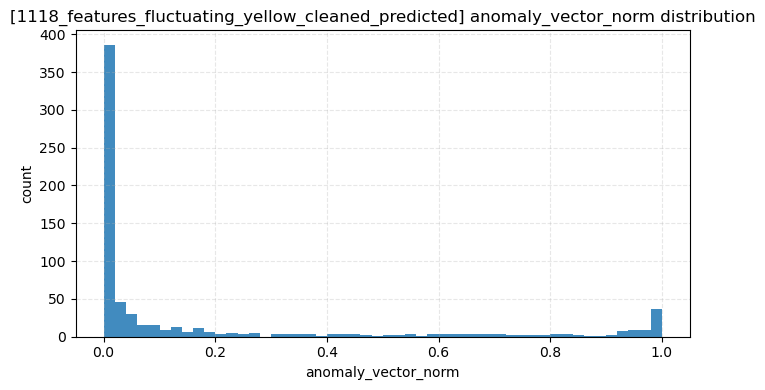


📂 Processing file: results/mlp/1118_features_misalignment_yellow_cleaned_predicted.csv


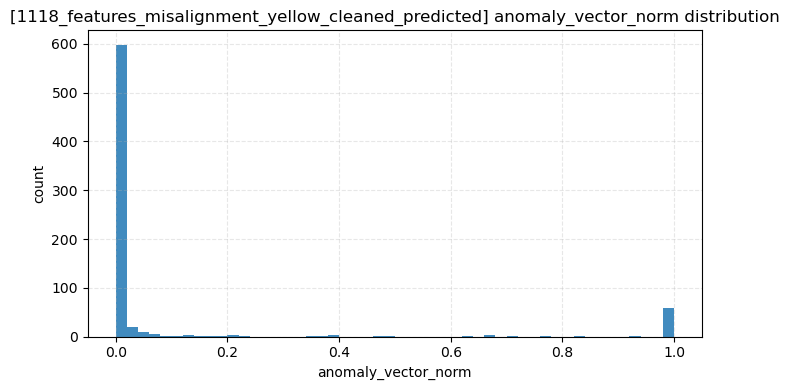

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

paths = [
    "results/mlp/1118_features_fluctuating_cleaned_predicted.csv",
    "results/mlp/1118_features_misalignment_cleaned_predicted.csv",
    "results/mlp/1118_features_cleaned_predicted.csv",
    "results/mlp/1118_features_fluctuating_yellow_cleaned_predicted.csv",
    "results/mlp/1118_features_misalignment_yellow_cleaned_predicted.csv"
]

def plot_single_file(csv_path):
    df = pd.read_csv(csv_path)

    if "anomaly_vector_norm" not in df.columns:
        raise ValueError(f"{csv_path} 에 anomaly_vector_norm 컬럼 없음")
    if "pred_label" not in df.columns:
        raise ValueError(f"{csv_path} 에 pred_label 컬럼 없음")

    filename = Path(csv_path).stem
    vector = df["anomaly_vector_norm"]
    labels = sorted(df["pred_label"].unique())

    print(f"\n📂 Processing file: {csv_path}")

    # 1) anomaly_vector_norm 전체 분포
    plt.figure(figsize=(7,4))
    plt.hist(vector, bins=50, alpha=0.85)
    plt.xlabel("anomaly_vector_norm")
    plt.ylabel("count")
    # plt.xlim(0.0, 1.0)
    plt.title(f"[{filename}] anomaly_vector_norm distribution")
    plt.grid(True, linestyle="--", alpha=0.3)
    plt.tight_layout()
    plt.show()

    # 2) pred_label별 분포
    # plt.figure(figsize=(7,4))
    # for lbl in labels:
    #     subset = df[df["pred_label"] == lbl]["anomaly_vector_norm"]
    #     plt.hist(subset, bins=50, alpha=0.5, label=lbl)
    # plt.xlabel("anomaly_vector_norm")
    # plt.ylabel("count")
    # plt.title(f"[{filename}] distribution by pred_label")
    # plt.legend()
    # plt.grid(True, linestyle="--", alpha=0.3)
    # plt.tight_layout()
    # plt.show()

    # 3) pred_label별 boxplot
    # plt.figure(figsize=(7,4))
    # box_data = [df[df["pred_label"] == lbl]["anomaly_vector_norm"] for lbl in labels]
    # plt.boxplot(box_data, labels=labels, showmeans=True)
    # plt.ylabel("anomaly_vector_norm")
    # plt.title(f"[{filename}] boxplot by pred_label")
    # plt.grid(True, axis="y", linestyle="--", alpha=0.3)
    # plt.tight_layout()
    # plt.show()


# 🔥 모든 파일을 독립적으로 시각화
for p in paths:
    plot_single_file(p)